Welcome to horsetail matching. This tutorial shows you how to setup and run a very simple horsetail matching optimization. This assumes you have followed the installation tutorial. First we import the module...

In [2]:
from horsetailmatching import UncertainParameter, HorsetailMatching
from horsetailmatching.demoproblems import TP1

The first thing required for an optimization under uncertainty is a function to optimize. The horsetail matching python module comes with several test problems, which we will use here. We require a function that takes two arguments: the value of the design variables, and the value of the uncertainties. It should return the value quantity of interest.  

In [3]:
my_func = TP1
print TP1([0,1],[1,0])

12.1255115436


Now we must define the input uncertainties to the problem. These are created as horsetail matching parameters, which have the method getSample which allows the horsetail matching object to sample them accordingly. Here we create a uniformly distributed uncertainty and a gaussian uncertainty.

In [4]:
u1 = UncertainParameter('uniform', lower_bound=-1, upper_bound=1)
u2 = UncertainParameter('gaussian', mean=0, standard_deviation=1)
input_uncs = [u1, u2]

Now we create the HorsetailMatching object which will do the evalation of the horsetail matching metric and its gradient. By default a standard target of t(h) = 0 is used. 

In [5]:
theHM = HorsetailMatching(my_func, input_uncs)

Now we use the evalMetric method to evaluate the horsetail matching metric at a design point:

In [6]:
ans = theHM.evalMetric(x=[1,1])
print(ans)

24.0049829889


We can use the plotHorsetail() method to visualize the behaviour under uncertainty. In this case it is a single PDF. 

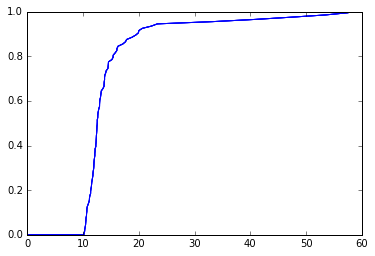

In [9]:
import matplotlib.pyplot as plt
theHM.plotHorsetail('b')
plt.show()

Now if we want to use this within an optimization, its a simple as passing theHM.evalMetric to whichever optimizer we like. For example, using the scipy optimize module's minimize function:

In [7]:
from scipy.optimize import minimize

solution = minimize(theHM.evalMetric, x0=[3,2], method='Nelder-Mead')
print(solution)

  status: 0
    nfev: 110
 success: True
     fun: 23.901454200320163
       x: array([-0.58490392,  1.74604425])
 message: 'Optimization terminated successfully.'
     nit: 54


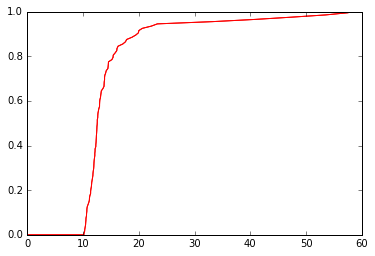

In [10]:
theHM.evalMetric(solution.x)
theHM.plotHorsetail('r')
plt.show()